<a href="https://colab.research.google.com/github/Himanshu0518/Agroassist/blob/main/Yeild_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from zipfile import ZipFile

In [ ]:
with ZipFile('archive.zip', 'r') as zip:
    zip.extractall()

In [ ]:
df = pd.read_csv('/content/yield_prediction_dataset.csv')

In [ ]:
df.head()

,field_id,date_of_image,latitude,longitude,NDVI,GNDVI,NDWI,SAVI,soil_moisture,temperature,rainfall,crop_type,yield,Unnamed: 13,Unnamed: 14
0,Field_1,01-01-2023,22.625231,88.497925,0.060190,0.084801,-0.084801,0.090280,46.119353,9.884229,1.662354,Rice,40.218031,NaN,NaN
1,Field_1,16-01-2023,22.625231,88.497925,0.213957,0.222009,-0.222009,0.320896,37.542525,13.967073,8.446302,Rice,30.870338,NaN,NaN
2,Field_1,31-01-2023,22.625231,88.497925,0.403306,0.431204,-0.431204,0.604837,24.926279,13.590147,3.862833,Rice,45.330050,NaN,NaN
3,Field_1,15-02-2023,22.625231,88.497925,0.418187,0.444132,-0.444132,0.627144,24.114157,12.343355,16.623542,Rice,49.711781,NaN,NaN
4,Field_1,03-02-2023,22.625231,88.497925,0.375138,0.387985,-0.387985,0.562591,27.420927,11.007707,9.496210,Rice,34.542646,NaN,NaN


In [ ]:
df.shape

(1625, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1625 entries, 0 to 1624
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   field_id       1625 non-null   object 
 1   date_of_image  1625 non-null   object 
 2   latitude       1625 non-null   float64
 3   longitude      1625 non-null   float64
 4   NDVI           1625 non-null   float64
 5   GNDVI          1625 non-null   float64
 6   NDWI           1625 non-null   float64
 7   SAVI           1625 non-null   float64
 8   soil_moisture  1625 non-null   float64
 9   temperature    1625 non-null   float64
 10  rainfall       1625 non-null   float64
 11  crop_type      1625 non-null   object 
 12  yield          1625 non-null   float64
 13  Unnamed: 13    0 non-null      float64
 14  Unnamed: 14    0 non-null      float64
dtypes: float64(12), object(3)
memory usage: 190.6+ KB


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# models
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import learning_curve , train_test_split


In [ ]:

algorithms = {
    'Random Forest': RandomForestRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'XGBoost': XGBRegressor(),
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
}

In [ ]:
num_cols = ['latitude', 'longitude', 'NDVI', 'GNDVI', 'NDWI', 'SAVI', 'soil_moisture', 'temperature', 'rainfall']
cat_cols = ["crop_type"]  # Added 'field_id', 'date_of_image'


In [ ]:

df.drop(columns=['field_id','date_of_image','Unnamed: 13','Unnamed: 14'],inplace=True)
df.head()

,latitude,longitude,NDVI,GNDVI,NDWI,SAVI,soil_moisture,temperature,rainfall,crop_type,yield
0,22.625231,88.497925,0.060190,0.084801,-0.084801,0.090280,46.119353,9.884229,1.662354,Rice,40.218031
1,22.625231,88.497925,0.213957,0.222009,-0.222009,0.320896,37.542525,13.967073,8.446302,Rice,30.870338
2,22.625231,88.497925,0.403306,0.431204,-0.431204,0.604837,24.926279,13.590147,3.862833,Rice,45.330050
3,22.625231,88.497925,0.418187,0.444132,-0.444132,0.627144,24.114157,12.343355,16.623542,Rice,49.711781
4,22.625231,88.497925,0.375138,0.387985,-0.387985,0.562591,27.420927,11.007707,9.496210,Rice,34.542646


In [ ]:

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(sparse_output=False ,  handle_unknown='ignore'), cat_cols)
], remainder='passthrough')


In [ ]:
X = df.drop('yield' , axis=1)
y = df['yield']

In [ ]:
X[0:3]

,latitude,longitude,NDVI,GNDVI,NDWI,SAVI,soil_moisture,temperature,rainfall,crop_type
0,22.625231,88.497925,0.060190,0.084801,-0.084801,0.090280,46.119353,9.884229,1.662354,Rice
1,22.625231,88.497925,0.213957,0.222009,-0.222009,0.320896,37.542525,13.967073,8.446302,Rice
2,22.625231,88.497925,0.403306,0.431204,-0.431204,0.604837,24.926279,13.590147,3.862833,Rice


In [ ]:
def plot_data(mean_scores, std_dev, sizes, ax, label):
    ax.plot(sizes, mean_scores, marker='o' , label=f'{label} Mean')
    ax.fill_between(x=sizes,
                    y1=mean_scores - std_dev,
                    y2 = mean_scores + std_dev,
                    alpha=0.5, label=f'{label} Variation'
                    )


In [ ]:
def plot_learning_curve(estimator, X, y, name):  # Pass name into the function

    model = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', estimator)
    ])

    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=3, scoring='r2')

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    train_score = f"{train_scores_mean[-1]:.2f} +/- {train_scores_std[-1]:.2f}" # Calculate train_score and test_score
    test_score = f"{test_scores_mean[-1]:.2f} +/- {test_scores_std[-1]:.2f}"

    print(f"Training Score: {train_score}")  # Now print train_score and test_score
    print(f"Test Score: {test_score}")


    fig, ax = plt.subplots(figsize=(10, 6))

    plot_data(train_scores_mean, train_scores_std, train_sizes, ax, f"Training ({train_score})")
    plot_data(test_scores_mean, test_scores_std, train_sizes, ax, f"Testing ({test_score})") # Changed label to Testing

    ax.set_xlabel('Training Sizes')
    ax.set_title(f"Learning Curve for {name}") # Use the passed name
    ax.set_ylabel('r2_score')
    ax.grid(True)
    ax.legend()
    plt.show()

Training Score: 0.99 +/- 0.00
Test Score: 0.89 +/- 0.05


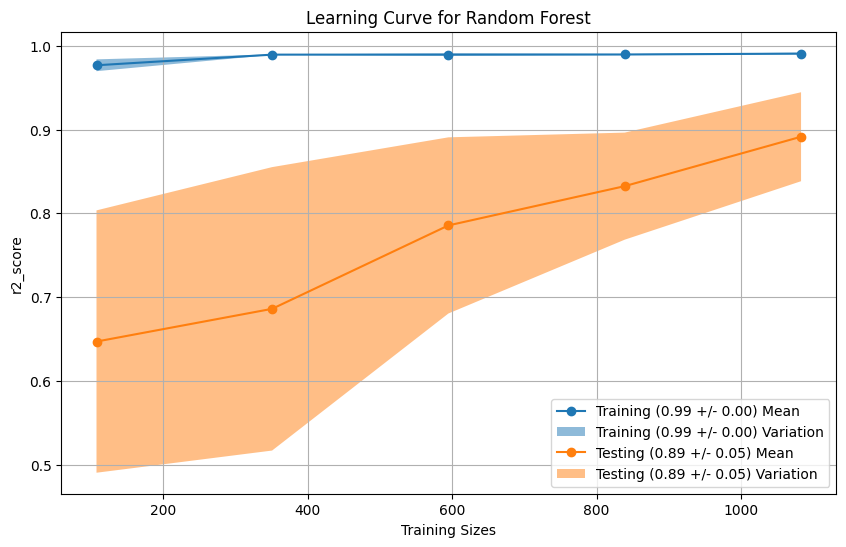

Training Score: 1.00 +/- 0.00
Test Score: 0.84 +/- 0.07


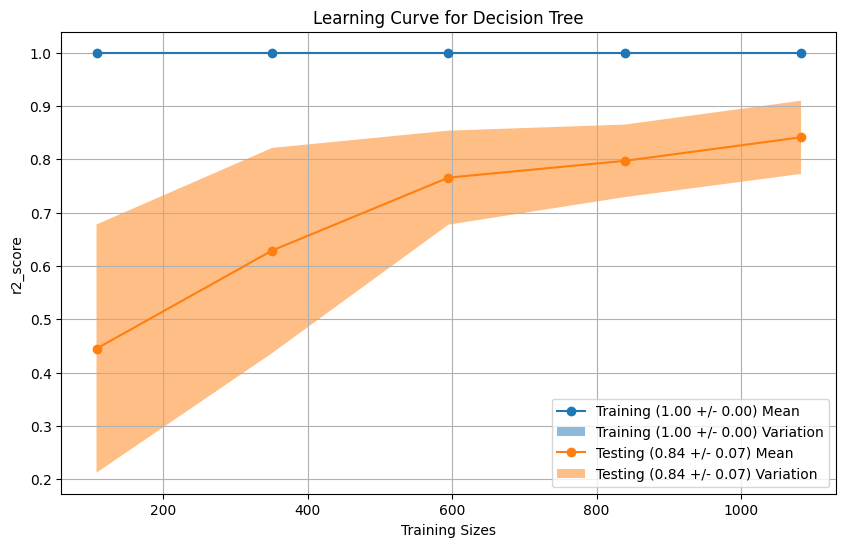

Training Score: 1.00 +/- 0.00
Test Score: 0.89 +/- 0.05


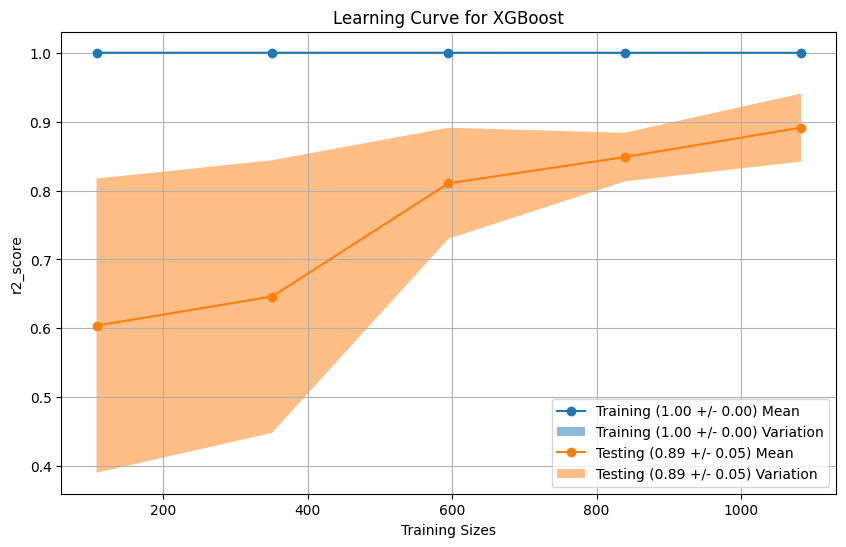

Training Score: 0.79 +/- 0.01
Test Score: -2712984246.40 +/- 3836739116.78


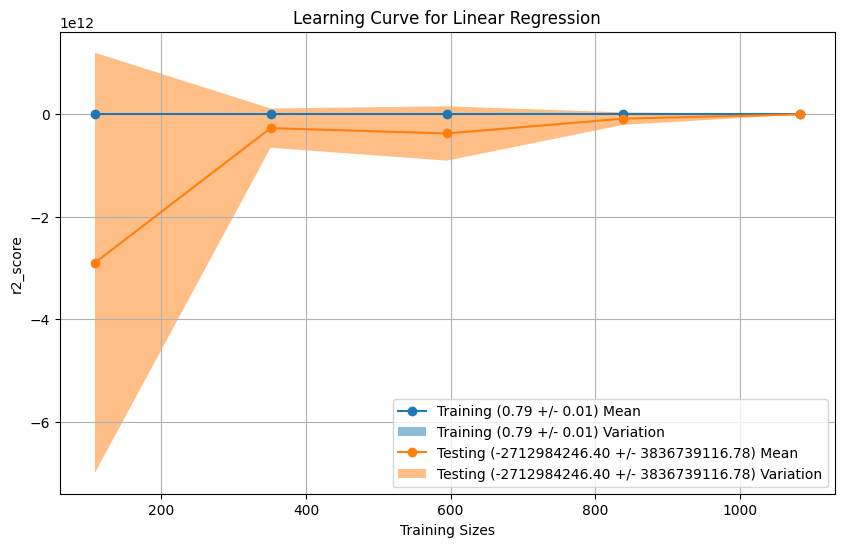

Training Score: 0.79 +/- 0.01
Test Score: 0.66 +/- 0.09


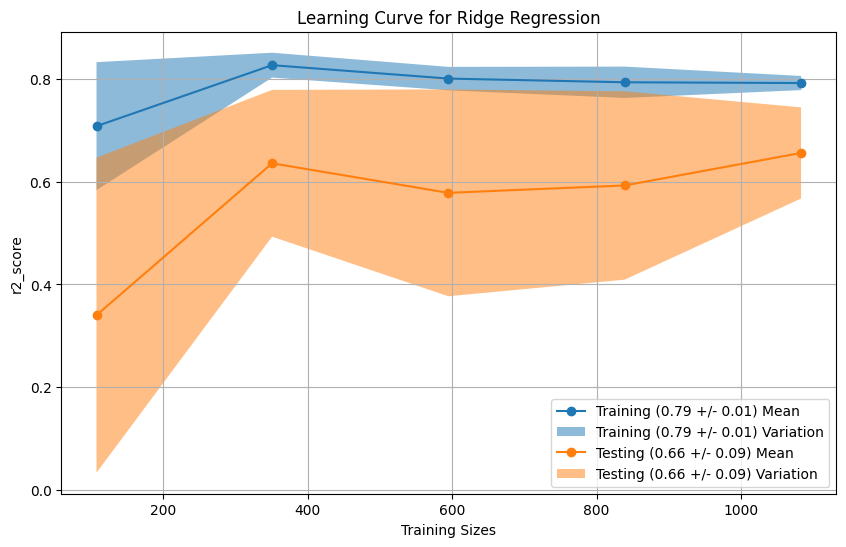

Training Score: 0.60 +/- 0.07
Test Score: 0.45 +/- 0.17


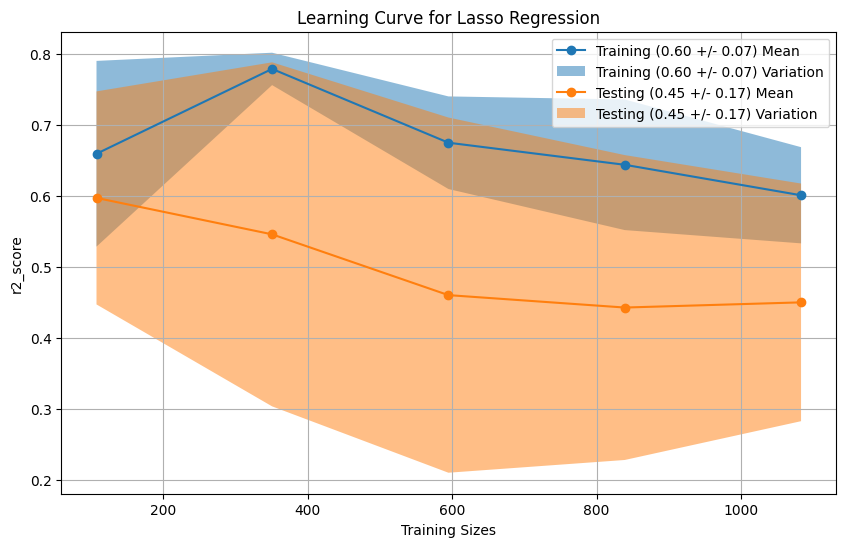

In [ ]:
for name,algo in algorithms.items():
  plot_learning_curve(algo , X , y,name)
  plt.show()

In [ ]:
model = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor())
    ])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['latitude', 'longitude',
                                                   'NDVI', 'GNDVI', 'NDWI',
                                                   'SAVI', 'soil_moisture',
                                                   'temperature', 'rainfall']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['crop_type'])])),
                ('regressor', RandomForestRegressor())])

In [ ]:
X_test[0:2]

,latitude,longitude,NDVI,GNDVI,NDWI,SAVI,soil_moisture,temperature,rainfall,crop_type
135,23.548702,77.361341,0.669679,0.574558,-0.574558,1.004380,14.885563,11.992515,8.867771,Maize
481,27.118176,88.179901,0.610653,0.597080,-0.597080,0.915831,14.338340,11.766257,15.758967,Tea


In [ ]:
def evaluate(model, X,y):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    return mse, r2

In [ ]:
print("(Trainning mse , Trainning r2_score) = ",evaluate(model, X_train, y_train))
print("(Testing mse , Testing r2_score) = ",evaluate(model, X_test, y_test))

(Trainning mse , Trainning r2_score) =  (0.5266314484269089, 0.9917800016778192)
(Testing mse , Testing r2_score) =  (6.216203789680448, 0.9198138881118533)


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Access the RandomForestRegressor within the pipeline using double underscores
param_grid = {
    'regressor__n_estimators': [50, 100, 200],           # Number of trees in the forest
    'regressor__max_depth': [None, 10, 20, 30],          # Maximum depth of the tree
    'regressor__min_samples_split': [2, 5, 10],          # Minimum number of samples to split a node
    'regressor__min_samples_leaf': [1, 2, 4],            # Minimum number of samples at a leaf node
    'regressor__max_features': ['sqrt', 'log2']          # Number of features to consider for the best split
}

# Now, GridSearchCV will correctly access the RandomForestRegressor's parameters
grg_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring='r2', cv=5, n_jobs=-1, verbose=2)

# Fit the model
grg_cv.fit(X_train, y_train)

# Get the best parameters and score
best_params = grg_cv.best_params_
best_score = grg_cv.best_score_

print("Best Parameters:", best_params)
print("Best R2 Score:", best_score)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'regressor__max_depth': 20, 'regressor__max_features': 'sqrt', 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 200}
Best R2 Score: 0.890077319003546


In [ ]:
import joblib

In [ ]:
joblib.dump(model , 'yeild_prediction.joblib')

['yeild_prediction.joblib']

In [ ]:
saved_model = joblib.load('yeild_prediction.joblib')

In [ ]:
saved_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['latitude', 'longitude',
                                                   'NDVI', 'GNDVI', 'NDWI',
                                                   'SAVI', 'soil_moisture',
                                                   'temperature', 'rainfall']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['crop_type'])])),
                ('regressor', RandomForestRegressor())])

In [ ]:
evaluate(saved_model, X_test, y_test)

(6.216203789680448, 0.9198138881118533)

In [ ]:
df['crop_type'].value_counts().shape

(30,)

In [ ]:
df['crop_type'].value_counts()

,count
crop_type,
Saffron,69
Barley,64
Wheat,63
Mustard,63
Bajra,61
Soybean,61
Millets,61
Tobacco,60
Linseed,59


In [ ]:
import pandas as pd

# Sample test cases for regression
test_cases_regression = [
    {'latitude': 28.6, 'longitude': 77.2, 'NDVI': 0.5, 'GNDVI': 0.4, 'NDWI': 0.3, 'SAVI': 0.6,
     'soil_moisture': 25, 'temperature': 30, 'rainfall': 250, 'crop_type': 'Wheat'},

    {'latitude': 28.6, 'longitude': 77.2, 'NDVI': 0.5, 'GNDVI': 0.4, 'NDWI': 0.3, 'SAVI': 0.6,
     'soil_moisture': 25, 'temperature': 30, 'rainfall': 250, 'crop_type': 'Banana'},

    {'latitude': 28.6, 'longitude': 77.2, 'NDVI': 0.5, 'GNDVI': 0.4, 'NDWI': 0.3, 'SAVI': 0.6,
     'soil_moisture': 25, 'temperature': 30, 'rainfall': 250, 'crop_type': 'Maize'},

    {'latitude': 20.5, 'longitude': 85.9, 'NDVI': 0.6, 'GNDVI': 0.5, 'NDWI': 0.45, 'SAVI': 0.7,
     'soil_moisture': 35, 'temperature': 29, 'rainfall': 275, 'crop_type': 'Sugarcane'},

    {'latitude': 10.0, 'longitude': 76.0, 'NDVI': 0.8, 'GNDVI': 0.6, 'NDWI': 0.55, 'SAVI': 0.85,
     'soil_moisture': 50, 'temperature': 34, 'rainfall': 350, 'crop_type': 'Cotton'},

    # Extreme Edge Cases
    {'latitude': 5.0, 'longitude': 95.0, 'NDVI': 1.0, 'GNDVI': 1.0, 'NDWI': 1.0, 'SAVI': 1.0,
     'soil_moisture': 100, 'temperature': 50, 'rainfall': 500, 'crop_type': 'Banana'},  # Extreme High

    {'latitude': -10.0, 'longitude': -80.0, 'NDVI': 0.0, 'GNDVI': 0.0, 'NDWI': 0.0, 'SAVI': 0.0,
     'soil_moisture': 0, 'temperature': -10, 'rainfall': 0, 'crop_type': 'Wheat'}  # Extreme Low
]

# Convert test cases to DataFrame
X_test_regression = pd.DataFrame(test_cases_regression)

# Predict using pipeline
predicted_yield = model.predict(X_test_regression)

# Display predictions
# Use built-in zip by importing it explicitly if it was shadowed
import builtins
for i, (case, prediction) in enumerate(builtins.zip(test_cases_regression, predicted_yield)):
    print(f"Test Case {i+1} | Crop: {case['crop_type']} | Predicted Yield: {prediction:.2f}")

Test Case 1 | Crop: Wheat | Predicted Yield: 59.00
Test Case 2 | Crop: Banana | Predicted Yield: 59.00
Test Case 3 | Crop: Maize | Predicted Yield: 59.00
Test Case 4 | Crop: Sugarcane | Predicted Yield: 60.12
Test Case 5 | Crop: Cotton | Predicted Yield: 64.60
Test Case 6 | Crop: Banana | Predicted Yield: 67.27
Test Case 7 | Crop: Wheat | Predicted Yield: 38.13


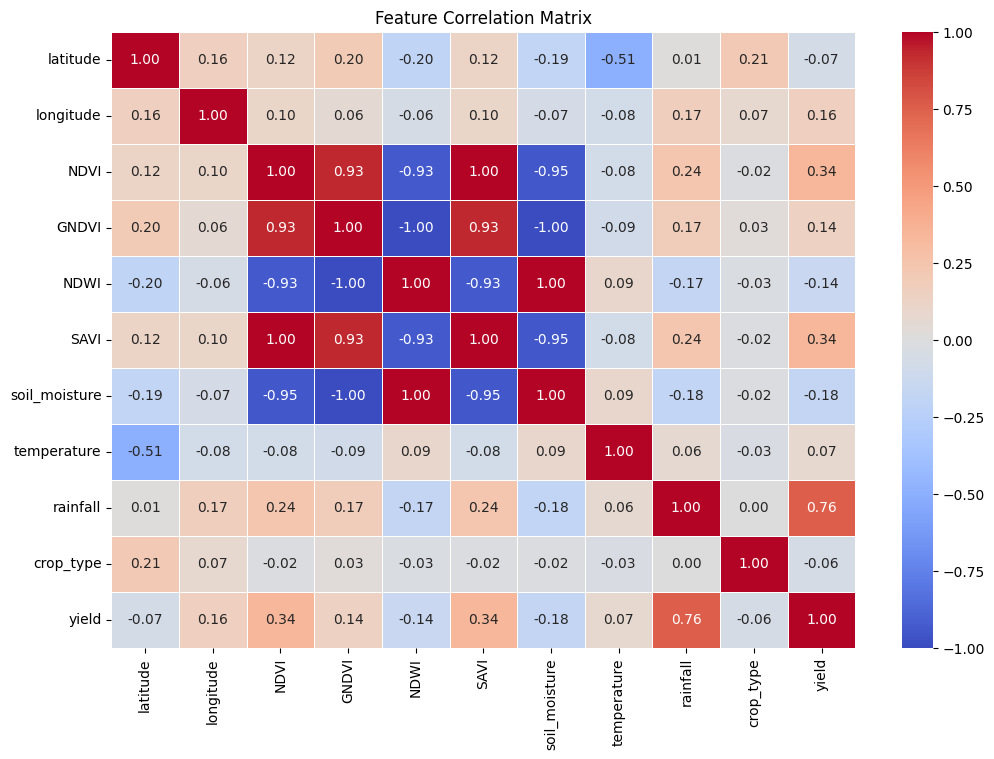

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label Encode crop_type
df['crop_type'] = LabelEncoder().fit_transform(df['crop_type'])

# Compute correlation matrix
correlation_matrix = df.corr()

# Display correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()


In [ ]:
!pip install shap


In [ ]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Assuming 'saved_model' is your trained model
# Assuming 'preprocessor' is your preprocessing pipeline

# Get feature names
feature_names = preprocessor.get_feature_names_out()


In [ ]:
# Create SHAP explainer
# Access the RandomForestRegressor within the pipeline
explainer = shap.TreeExplainer(saved_model.named_steps['regressor'])

# Transform input data (without target column)
X_transformed = preprocessor.transform(X)  # X = dataset without 'yield'

# Compute SHAP values
shap_values = explainer.shap_values(X_transformed)

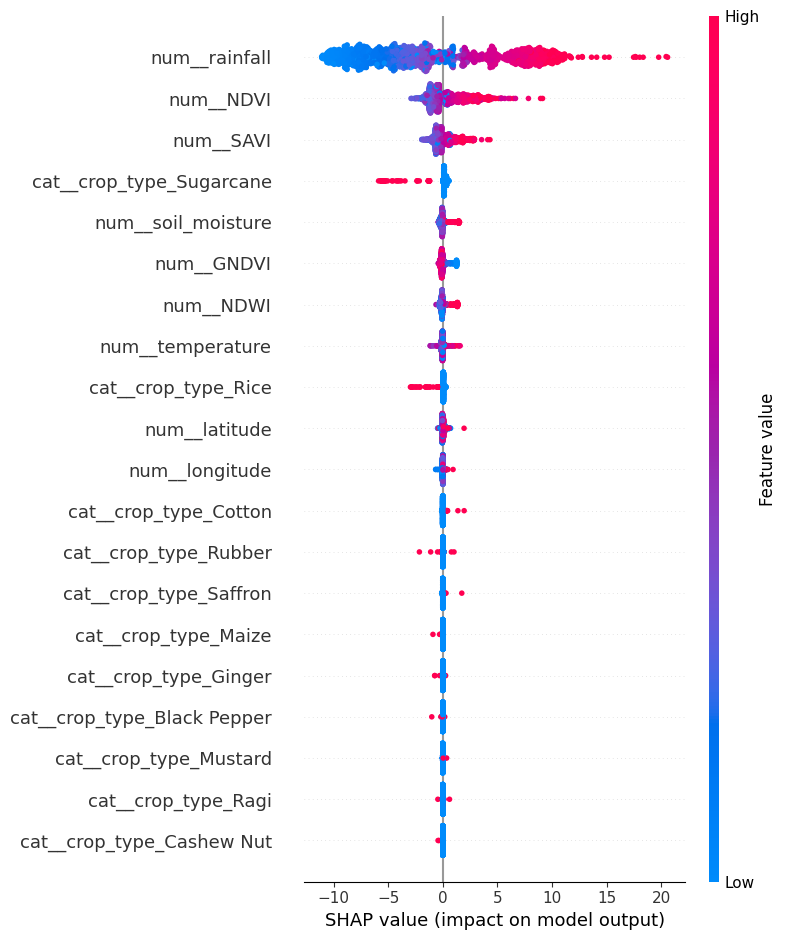

In [ ]:
shap.summary_plot(shap_values, X_transformed, feature_names=feature_names)
